# Neural Network Assignment
## Forest fires data
Predict the burnt area of forest fires with Neural Network

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, KFold

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from scikeras.wrappers import KerasClassifier

In [43]:
data = pd.read_csv('forestfires.csv')

### Data Description
- month:	month of the year: 'jan' to 'dec'
- day:	day of the week: 'mon' to 'sun'
- FFMC:	FFMC index from the FWI system: 18.7 to 96.20
- DMC:	DMC index from the FWI system: 1.1 to 291.3
- DC:	DC index from the FWI system: 7.9 to 860.6
- ISI:	ISI index from the FWI system: 0.0 to 56.10
- temp:	temperature in Celsius degrees: 2.2 to 33.30
- RH:	relative humidity in %: 15.0 to 100
- wind:	wind speed in km/h: 0.40 to 9.40
- rain:	outside rain in mm/m2 : 0.0 to 6.4
- size_category: 	the burned area of the forest (small,large)

In [44]:
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [45]:
data.isna().sum().any()

False

In [46]:
data.duplicated().sum()

8

In [47]:
data.drop_duplicates(inplace=True)

<Axes: xlabel='day', ylabel='area'>

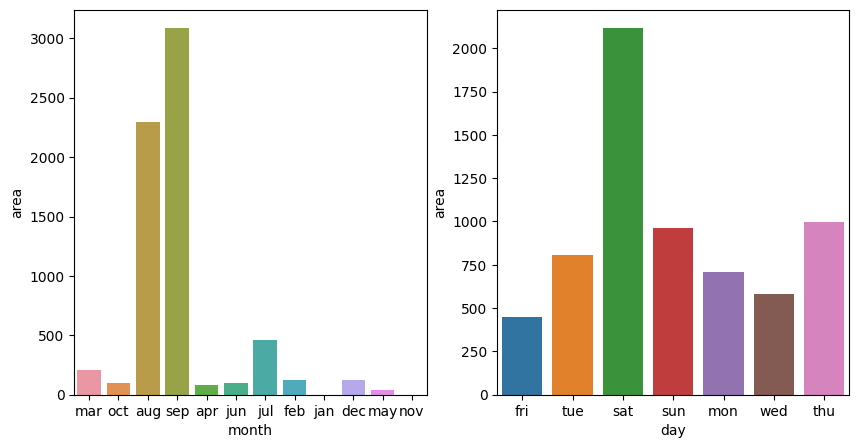

In [48]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.barplot(data=data,x='month',y='area',estimator='sum',errorbar=None)
plt.subplot(1,2,2)
sns.barplot(data=data,x='day',y='area',estimator='sum',errorbar=None)

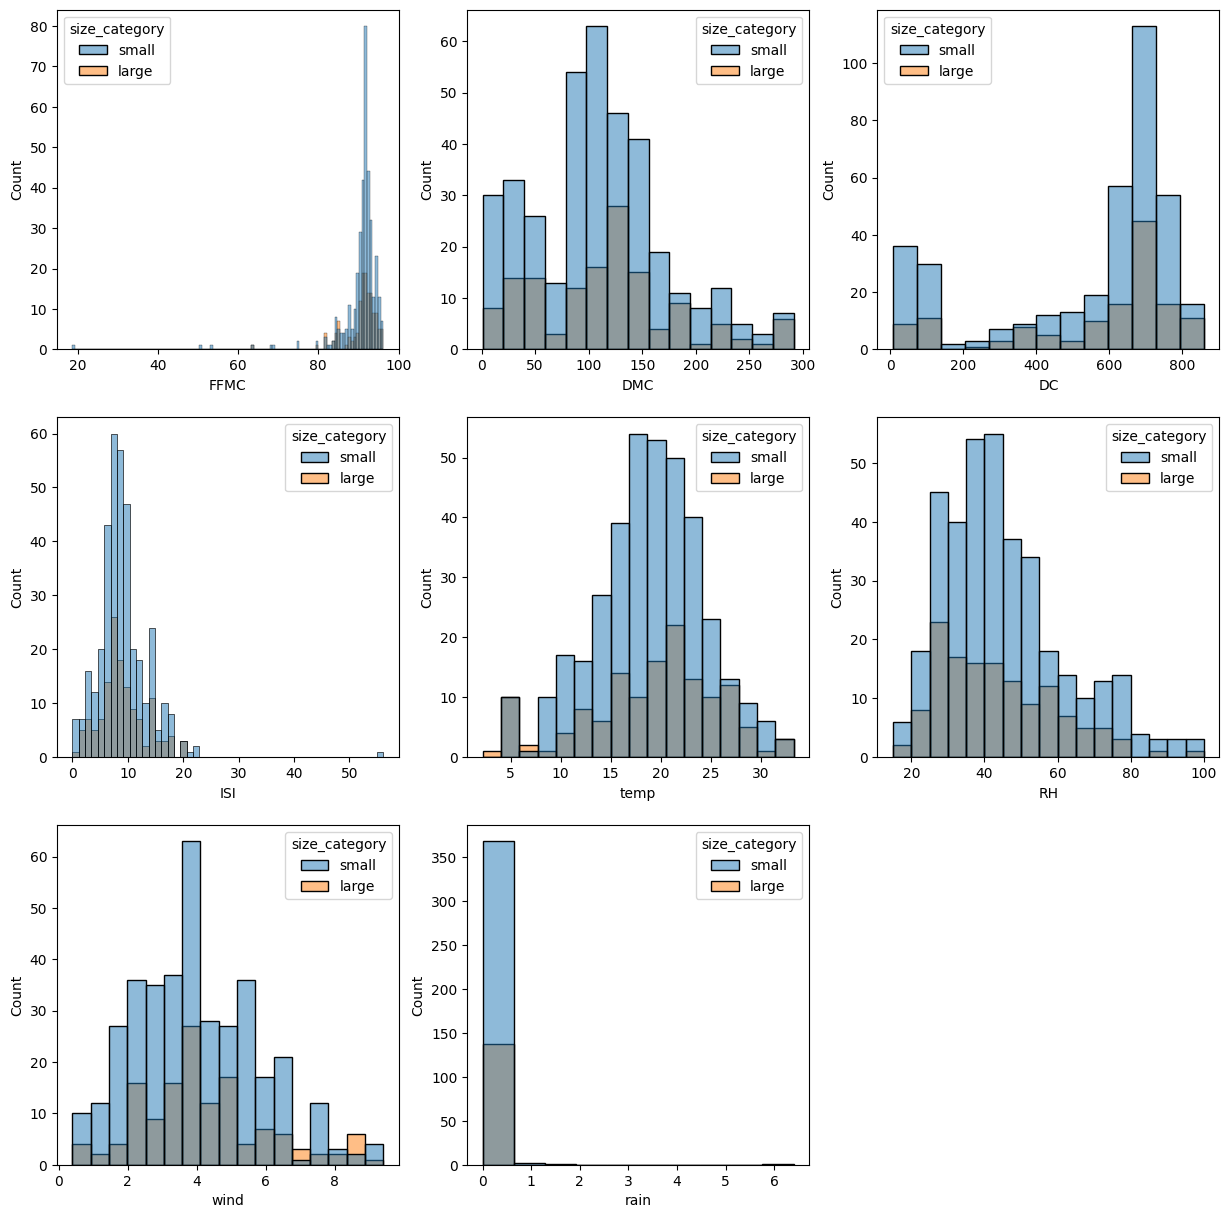

In [49]:
num_columns = ['FFMC','DMC','DC','ISI','temp','RH','wind','rain']

plt.figure(figsize=(15,15))
for i in range(len(num_columns)):
    plt.subplot(3,3,i+1)
    sns.histplot(data=data,x=num_columns[i],hue='size_category')

In [50]:
data.drop(['month','day','size_category'], axis=1, inplace=True)

In [51]:
x = data.drop('area', axis=1)
y = data['area']

In [52]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [53]:
x.shape

(509, 27)

In [69]:
def create_model(hidden_units=54, optimizer='adam',activation='relu',dropout_rate=0.0):
    model = Sequential([
        Dense(hidden_units, input_dim=27, activation='relu'),
        Dropout(dropout_rate),
        Dense(27,activation='relu'),
        Dense(1, activation=activation)
    ])
    model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['accuracy'])
    return model

In [70]:
param_grid = {'batch_size':[40,60,80], 
              'epochs':[30,40,50,60,70,80]}

In [71]:
#model = KerasClassifier(build_fn=create_model, verbose=0)
model = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn=create_model, verbose=0)

/tmp/ipykernel_9399/4050948163.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn=create_model, verbose=0)


In [72]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=KFold(), verbose=10)
grid_result = grid.fit(x,y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5; 1/18] START batch_size=40, epochs=30...................................
[CV 1/5; 1/18] END ....batch_size=40, epochs=30;, score=0.000 total time=   1.4s
[CV 2/5; 1/18] START batch_size=40, epochs=30...................................
[CV 2/5; 1/18] END ....batch_size=40, epochs=30;, score=0.000 total time=   1.4s
[CV 3/5; 1/18] START batch_size=40, epochs=30...................................
[CV 3/5; 1/18] END ....batch_size=40, epochs=30;, score=0.039 total time=   1.3s
[CV 4/5; 1/18] START batch_size=40, epochs=30...................................
[CV 4/5; 1/18] END ....batch_size=40, epochs=30;, score=0.000 total time=   1.3s
[CV 5/5; 1/18] START batch_size=40, epochs=30...................................
[CV 5/5; 1/18] END ....batch_size=40, epochs=30;, score=0.000 total time=   1.5s
[CV 1/5; 2/18] START batch_size=40, epochs=40...................................
[CV 1/5; 2/18] END ....batch_size=40, epochs=40;

In [73]:
print('Best: {}, using {}'.format(grid_result.best_score_, grid_result.best_params_))

Best: 0.2078431375324726, using {'batch_size': 40, 'epochs': 60}


<Axes: xlabel='param_epochs', ylabel='param_batch_size'>

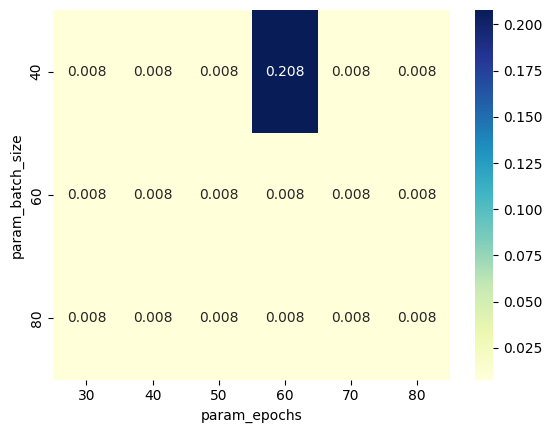

In [74]:
grid_result_df = pd.DataFrame(grid_result.cv_results_)
mean_scores = grid_result_df.pivot_table(values='mean_test_score', index='param_batch_size', columns='param_epochs')
sns.heatmap(mean_scores, cmap="YlGnBu", annot=True, fmt=".3f")

In [75]:
model = create_model()
history = model.fit(x,y,validation_split=0.2,epochs=60,batch_size=40)

Epoch 1/60
11/11 [==============================] - 1s 15ms/step - loss: 3614.9834 - accuracy: 0.2482 - val_loss: 6800.1353 - val_accuracy: 0.0294
Epoch 2/60
11/11 [==============================] - 0s 4ms/step - loss: 3602.8984 - accuracy: 0.0565 - val_loss: 6777.2744 - val_accuracy: 0.0098
Epoch 3/60
11/11 [==============================] - 0s 4ms/step - loss: 3589.8289 - accuracy: 0.0074 - val_loss: 6755.8013 - val_accuracy: 0.0000e+00
Epoch 4/60
11/11 [==============================] - 0s 4ms/step - loss: 3576.9561 - accuracy: 0.0000e+00 - val_loss: 6733.4263 - val_accuracy: 0.0000e+00
Epoch 5/60
11/11 [==============================] - 0s 4ms/step - loss: 3561.9133 - accuracy: 0.0000e+00 - val_loss: 6711.0610 - val_accuracy: 0.0000e+00
Epoch 6/60
11/11 [==============================] - 0s 4ms/step - loss: 3545.2146 - accuracy: 0.0000e+00 - val_loss: 6688.3652 - val_accuracy: 0.0000e+00
Epoch 7/60
11/11 [==============================] - 0s 4ms/step - loss: 3527.5027 - accuracy: 0

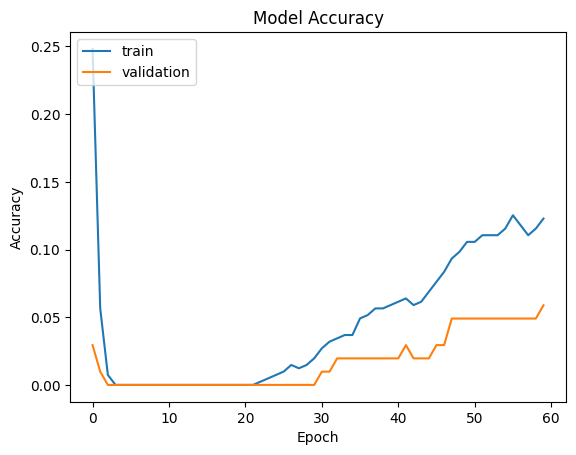

In [76]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'validation'], loc='upper left')

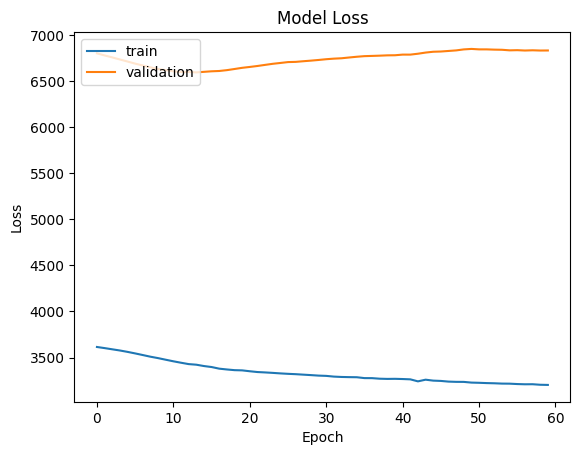

In [77]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'validation'], loc='upper left')